# Project: Investigate European Soccer Database

Hakan Özler - May Cohort 2018

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 

I investigate European Soccer Database. The database consists of seven tables namely 'Country', 'League', 'Player', 'Player Attributes', 'Team', 'Team Attributes', and 'Match'. Briefly, the dataset contains useful statistics about 11 different European Leagues between 2008 and 2016. The database piques my interest in practicing what I have learned so far. The original source of the database can be found on [Kaggle](https://www.kaggle.com/hugomathien/soccer). You should download it before data wrangling.

After observing the tables, I come up with the following three questions:

1. Which team had the most victories at home in 2010/2011 season?

2. Which season had the most home and/or away goals over the seasons?

3. Which team won on 2014/2015 season in Spain LIGA BBVA?

I also want to analyze the example questions given on the [database page](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True):

1. What teams improved the most over the time period?

2. Which players had the most penalties?

3. What team attributes lead to the most victories?

In total, I have six questions that I need their answers. 


In [1]:
# import the modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sqla

% matplotlib inline
# I have a retina mac, and this magic makes the charts more sharp
%config InlineBackend.figure_format = 'retina'

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Here, I load the database and query each table seperately in order to observe the data. I want to practice more with `Pandas` so instead of using SQL (which I'll show you the equivalent SQL query in a few minutes), I directly query the `SELECT` command for each table and use `Pandas`'s magics. I followed the approach written in the tips in a seperate notebook where I explored the tables deeply. My aim is to demostrate the important parts of data and the way how I cleaned them by explaining in detail.

In [2]:
# connect to the SQLite database with SQLAlchemy and read data
soccer = sqla.create_engine('sqlite:///database.sqlite')

# retrive all tables
df_country = pd.read_sql('select * from Country', soccer)
df_league = pd.read_sql('select * from League', soccer)
df_player = pd.read_sql('select * from Player', soccer)
df_player_att = pd.read_sql('select * from Player_Attributes', soccer)
df_team = pd.read_sql('select * from Team', soccer)
df_team_att = pd.read_sql('select * from Team_Attributes', soccer)
df_match = pd.read_sql('select * from Match', soccer)

In [3]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
df_country.shape

(11, 2)

The `country` table has 2 columns, plus we're dealing with 11 unique countries in this database. Next, we retrieve the leagues of eleven countries.

In [5]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
df_country.shape

(11, 2)

In [7]:
df_player.shape

(11060, 7)

Player table contains 11k rows, I just retrieve the first 5 rows to observe.

In [8]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [9]:
len(df_player.player_name.unique())

10848

There are 10848 unique player names out of 11060 which is acceptable because there are several names like Alex, Raul that are common as a full name.

In [10]:
df_player.query('player_name == "Alex"')

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
437,438,150396,Alex,186613,1989-01-29 00:00:00,182.88,170
438,440,163838,Alex,198033,1991-08-27 00:00:00,175.26,148
439,442,26564,Alex,136130,1982-06-17 00:00:00,187.96,203


This time, I decided to group `player_name` and `player_api_id` together to search the unique players.

In [11]:
df_player.groupby(['player_name' ,'player_api_id']).count().count()

id                    11060
player_fifa_api_id    11060
birthday              11060
height                11060
weight                11060
dtype: int64

In [12]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


If I need to do something with this table, I only need to convert the date columns which is currently of type `String`.

In [13]:
df_player_att.shape

(183978, 42)

In [14]:
df_player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In the team attributes table, I see that there is one foreign key (i.e. `player_api_id`). I need to know the names of the players. I'll apply a `merge` operation over the Player table later on. This table is so essential to find out interesting statistics about players performance over the years.

In [15]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [16]:
len(df_team.team_long_name.unique())

296

In [17]:
df_team.shape

(299, 5)

299 teams are waiting us to explore. The `team_long_name` column contains 296 unique team name, there should be 6 duplicate rows I think, let's control:

In [18]:
df_team.duplicated().sum()

0

Hmm, I expect 6 rows but nothing shows up. I need to investigate more on that problem because, It's abnormal for two teams having the same name.

In [19]:
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Here, we need to know the team name of each row because `team_api_id` corresponds to a team. We'll perform another merge operation on the Team table.

In [20]:
df_team_att.shape

(1458, 25)

The last table is match. In the match table, I have seen 4 important id columns (i.e. `country_id`,  `league_id`, `home_team_api_id`, and `away_team_api_id`). After merging the corresponding tables with the match table, we can analyze several questions like the ones I have written down.

In [21]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [22]:
# number of duplicated rows
df_match.duplicated().sum()

0

In [23]:
df_match.shape

(25979, 115)

In [24]:
# number of missing values
df_match.isnull().sum().sum()

407395

In [25]:
# number of missing values
df_match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

There are a lot of missing values in the match table. I can drop some columns that we are not interested in. The first 11 columns are what we need for our questions.

### Data Cleaning : The Match Table

Now I start cleaning the match table by adding new columns and dropping columns that we don't use for the questions. 

In [26]:
# drop any columns that contains a missing value
df_match.dropna(axis='columns', inplace=True)

In [27]:
# new look
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


Now, it's better to analyze and examine the information details.

In [28]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


I find that I have to convert the date column to datatime since it's now object which is of type `String` and I want to divide the 'season' column into 2 seperate columns as 'start_season' and 'end_season', Let's do it!


In [29]:
df_match['date'] = pd.to_datetime(df_match['date'])

I want to add another column as well as a year column:

In [30]:
df_match['year'] = df_match['date'].dt.year

In [31]:
# split the session column into two columns
start_season = df_match['season'].apply(lambda x: x.split("/")[0])
end_season = df_match['season'].apply(lambda x: x.split("/")[1])

df_match['start_season'] = start_season
df_match['end_season'] = end_season

# drop the session column, we don't need it anymore
df_match.drop(columns=['season'], axis=1, inplace=True)

Now I want to get away from id columns which are `country_id`, `leage_id`, `home_team_api_id` and `away_team_api_id` in order to do that, I need to find the corresponding names of each id from others DataFrames by merging with the match dataset.

In [32]:
# start first with the country_id:

# rename name to country_name and id to country_id
df_country.rename(columns={'name' : 'country_name', 'id': 'country_id'}, inplace=True)

# apply inner merge with country table
df_match = df_match.merge(df_country, how='inner', left_on='country_id', right_on='country_id')

# drop now country_id
df_match.drop(columns=['country_id'], inplace=True)

# let's look at the new view
df_match.head()

,id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009,Belgium
1,2,1,1,2008-08-16,492474,10000,9994,0,0,2008,2008,2009,Belgium
2,3,1,1,2008-08-16,492475,9984,8635,0,3,2008,2008,2009,Belgium
3,4,1,1,2008-08-17,492476,9991,9998,5,0,2008,2008,2009,Belgium
4,5,1,1,2008-08-16,492477,7947,9985,1,3,2008,2008,2009,Belgium


I carry out the same method with the League table:

In [33]:
# I don't modify the data league itself, so just I copy it
df_copy_league = df_league.copy()

# rename the two columns 'name' and 'id'
df_copy_league.rename(columns={'name': 'league_name', 'id': 'league_id'}, inplace=True)

# apply inner merge with league table
df_match = df_match.merge(df_copy_league, how='inner', left_on='league_id', right_on='league_id')

# drop now country_id and league_id
df_match.drop(columns=['league_id', 'country_id'], inplace=True)

# see the new look 
df_match.head()

,id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name
0,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009,Belgium,Belgium Jupiler League
1,2,1,2008-08-16,492474,10000,9994,0,0,2008,2008,2009,Belgium,Belgium Jupiler League
2,3,1,2008-08-16,492475,9984,8635,0,3,2008,2008,2009,Belgium,Belgium Jupiler League
3,4,1,2008-08-17,492476,9991,9998,5,0,2008,2008,2009,Belgium,Belgium Jupiler League
4,5,1,2008-08-16,492477,7947,9985,1,3,2008,2008,2009,Belgium,Belgium Jupiler League


We need to know which teams played together:

In [34]:
df_copy_team = df_team.copy()

# we don't need 'team_fifa_api_id', 'team_short_name', and 'id' columns in the copy team table
df_copy_team.drop(columns=[ 'team_fifa_api_id', 'team_short_name', 'id'], axis=1, inplace=True)

df_copy_team.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


In [35]:
# first merge for the home_team_id
df_match = df_match.merge(df_copy_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match.rename(columns={'team_long_name': 'home_team_name'}, inplace=True)

df_match.drop(columns=['home_team_api_id', 'team_api_id'], axis=1, inplace=True)

# second merge the away_team_id
df_match = df_match.merge(df_copy_team, how='left', left_on='away_team_api_id', right_on='team_api_id')

df_match.rename(columns={'team_long_name': 'away_team_name'}, inplace=True)

df_match.drop(columns=['team_api_id', 'away_team_api_id'], axis=1, inplace=True)

# see the new look of the match table
df_match.head()

,id,stage,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name
0,1,1,2008-08-17,492473,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,29,12,2008-11-15,492583,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare
2,47,14,2008-11-29,492651,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge
3,65,16,2008-12-13,492713,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi
4,94,19,2009-01-24,492805,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons


I think now It's better to understand each row. One last thing, I want to know who wins or whether there is a tie in each match. To do so, I will create a new column called 'winner' and create a function to determine the values.

In [36]:
def winner(row):
    home_score = row[0]
    away_score = row[1]
    home_team_name = row[2]
    away_team_name = row[3]
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'Tie'

df_match['winner']  = df_match[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(winner, axis=1)

we don't need 'match_api_id' and 'stage', plus I couldn't find what the stage means in this table.


In [37]:
df_match.drop(['stage', 'match_api_id'], axis=1, inplace=True)

we save the clean data table: 

In [38]:
df_match.to_csv('matches_clean.csv', index=False)

Let's look at the new match table again:

In [39]:
pd.read_csv('matches_clean.csv').head()

,id,date,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name,winner
0,1,2008-08-17,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,29,2008-11-15,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Tie
2,47,2008-11-29,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008-12-13,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2009-01-24,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


Another way to do that we can start using the following SQL command to retrive home and away team names and winners in one table:

In [40]:
df_match_sql = \
pd.read_sql('SELECT '\
            'm.id as id, m.date as date, m.home_team_goal as home_team_goal, m.away_team_goal as away_team_goal, m.season as season,'\
            'c.name as country_name, l.name as league_name, t.team_long_name as home_team_name, m.team_away_name as team_away_name, '\
            'CASE WHEN  m.home_team_goal >  m.away_team_goal THEN t.team_long_name '\
                 'WHEN  m.home_team_goal < m.away_team_goal THEN m.team_away_name ' \
                 'ELSE "Tie" END AS winner ' \
            'FROM (select ma.*, tm.team_long_name as team_away_name from Match ma join Team tm on tm.team_api_id = ma.away_team_api_id) m '\
            'JOIN Country c '\
            'ON c.id = m.country_id '\
            'JOIN League l '\
            'ON l.id = m.league_id '\
            'JOIN Team t '\
            'ON t.team_api_id = m.home_team_api_id '\
            'LIMIT 5', soccer)

df_match_sql.head()

,id,date,home_team_goal,away_team_goal,season,country_name,league_name,home_team_name,team_away_name,winner
0,1,2008-08-17 00:00:00,1,1,2008/2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,2,2008-08-16 00:00:00,0,0,2008/2009,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,Tie
2,3,2008-08-16 00:00:00,0,3,2008/2009,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,RSC Anderlecht
3,4,2008-08-17 00:00:00,5,0,2008/2009,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,KAA Gent
4,5,2008-08-16 00:00:00,1,3,2008/2009,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,Standard de Liège


### Data Cleaning : Team and Team Attributes Tables

As we observed previously, we found 296 unique team names but the total rows of the table is 299.

In [41]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [42]:
# find duplicated teams by club name
def unique_team_names():
    return df_team.team_long_name.value_counts()

unique_team_names()[:10]

Royal Excel Mouscron    2
Widzew Łódź             2
Polonia Bytom           2
Xerez Club Deportivo    1
KSV Roeselare           1
Ross County FC          1
Beerschot AC            1
SL Benfica              1
Genoa                   1
Heracles Almelo         1
Name: team_long_name, dtype: int64

In [43]:
# find duplicated teams by club name
df_team.team_long_name.value_counts()[df_team.team_long_name.value_counts() >= 2]

Royal Excel Mouscron    2
Widzew Łódź             2
Polonia Bytom           2
Name: team_long_name, dtype: int64

In [44]:
# It could be better to find duplicated teams by team_long_name and team_fifa_api_id
group_fifa_id_and_team_name = df_team.groupby(['team_fifa_api_id','team_long_name'])

# True if the count is greater than and equal to 2
dupicated_team_names = group_fifa_id_and_team_name['id'].count().apply(lambda count: count >= 2)

# list
group_fifa_id_and_team_name['id'].count()[dupicated_team_names]

team_fifa_api_id  team_long_name      
301.0             Widzew Łódź             2
111429.0          Polonia Bytom           2
111560.0          Royal Excel Mouscron    2
Name: id, dtype: int64

We found the teams that appear twice.

In [45]:
df_team.query('team_long_name == "Royal Excel Mouscron"')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP


In [46]:
df_team.query('team_long_name == "Polonia Bytom"')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
182,31444,8031,111429.0,Polonia Bytom,POB
183,31445,8020,111429.0,Polonia Bytom,GOR


In [47]:
df_team.query('team_long_name == "Widzew Łódź"')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
189,31451,8244,301.0,Widzew Łódź,LOD
199,32409,8024,301.0,Widzew Łódź,WID


Since the `fifa_ids` are equal for each team, we can drop ones:

In [48]:
# drop the duplicated rows by index id 
df_team.drop(index=[24, 183, 199], inplace=True)

In [49]:
# we don't see any duplicated names
unique_team_names()[:10]

Heracles Almelo         1
Górnik Łęczna           1
KSV Roeselare           1
Ross County FC          1
Beerschot AC            1
SL Benfica              1
Polonia Bytom           1
Genoa                   1
Xerez Club Deportivo    1
Gil Vicente FC          1
Name: team_long_name, dtype: int64

In order to know the name of teams for each row, we need to merge the team attribute table with the team table.

In [50]:
# use inner join to combine teams with their attributes
df_team_att_merged = df_team_att.merge(df_team, left_on='team_api_id', right_on='team_api_id')

# drop 3 columns that we don't need
df_team_att_merged.drop(columns=['team_fifa_api_id_x', 'id_y', 'team_fifa_api_id_y'], inplace=True)

# rename 2 columns because after merging two tables, the same columns get appended with the default suffix, _x for the left table, _y for the right table
df_team_att_merged.rename(columns={'id_x': 'id', 'team_fifa_api_id_x': 'team_fifa_api_id'}, inplace=True)

df_team_att_merged.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE


In [51]:
# find information about the table, like row and column numbers, data types of each column
df_team_att_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1450
Data columns (total 26 columns):
id                                1451 non-null int64
team_api_id                       1451 non-null int64
date                              1451 non-null object
buildUpPlaySpeed                  1451 non-null int64
buildUpPlaySpeedClass             1451 non-null object
buildUpPlayDribbling              487 non-null float64
buildUpPlayDribblingClass         1451 non-null object
buildUpPlayPassing                1451 non-null int64
buildUpPlayPassingClass           1451 non-null object
buildUpPlayPositioningClass       1451 non-null object
chanceCreationPassing             1451 non-null int64
chanceCreationPassingClass        1451 non-null object
chanceCreationCrossing            1451 non-null int64
chanceCreationCrossingClass       1451 non-null object
chanceCreationShooting            1451 non-null int64
chanceCreationShootingClass       1451 non-null object
chanceCreationPositi

We need to convert the date column in this table:

In [52]:
df_team_att_merged['date'] = pd.to_datetime(df_team_att_merged['date'])

I want to add a year column as well into the table:

In [53]:
df_team_att_merged['year'] = df_team_att_merged['date'].dt.year

We can safely save the new table to a csv file:

In [54]:
df_team_att_merged.to_csv('team_attributes_edited.csv', index=False)

### Data Cleaning : Player and Player Attributes Tables

Let's find out whether there are duplicated players in the player table:

In [55]:
# find duplicate players by name and fifa_id
group_player_fifa_id_and_name = df_player.groupby(['player_fifa_api_id','player_name'])

list_of_dupicated_players = group_player_fifa_id_and_name['id'].count().apply(lambda count: count>=2)

group_player_fifa_id_and_name['id'].count()[list_of_dupicated_players]

Series([], Name: id, dtype: int64)

We don't have duplicated players which is good. 

We should convert the date column from `String` to `date` in the Player Attributes table.

In [56]:
df_player_att['date'] = pd.to_datetime(df_player_att['date'])

Recall that we need to know the player names not their ids, so we again use a merge operation to combine players and the player attributes tables:

In [57]:
df_player_att = df_player_att.merge(df_player, left_on='player_api_id', right_on='player_api_id')

In [58]:
df_player_att.rename(columns={'id_x': 'id'}, inplace=True)

In [59]:
df_player_att.drop(columns=['id_y', 'player_fifa_api_id_y', 'player_fifa_api_id_x'], inplace=True)

In [60]:
df_player_att['birthday'] = pd.to_datetime(df_player_att['birthday'])

In [61]:
df_player_att.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
2,3,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
3,4,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187
4,5,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187


In [62]:
df_player_att.shape

(183978, 45)

We're free to save the new table to a csv file:

In [63]:
df_player_att.to_csv('player_atts_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

After data wrangling, I start finding the answers of the questions.

### Research Question 1 : Which team had the most victories at home in 2010/2011 season?

First, we need to remember the last modified structure of the match table. For this question, we need to look at four columns namely `start_season`, `end_season`, `home_team_name`, and `winner` columns. These columns will provide the solution path we want to. 

In [64]:
matches = pd.read_csv('matches_clean.csv')
matches.head()

,id,date,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name,winner
0,1,2008-08-17,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,29,2008-11-15,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Tie
2,47,2008-11-29,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008-12-13,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2009-01-24,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


We need to retrieve first the matches taking place between 2010 and 2011. After narrowing down the rows, the winners must be from the `home_team_name` column because we are looking a team that had the most victories at home not away. Note that we are not observing the most winner in a specific league. What we find is that finding the most winner in 11 European Leagues in 2010/2011 season.

In [65]:
# first query by start_season, end_season and  home_team_name must be the same values in the winner column.
matches.query('start_season == 2010 and end_season == 2011 and home_team_name == winner')\
.groupby(['home_team_name', 'winner']).count()['id'].sort_values(ascending=False)[:2]

home_team_name     winner           
Manchester United  Manchester United    18
Real Madrid CF     Real Madrid CF       16
Name: id, dtype: int64

Our approaches works well that we found Manchester United is the most winner.

In [66]:
df_team.query('team_long_name == "Manchester United"')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
25,3457,10260,11.0,Manchester United,MUN


### Research Question 2 : Which season had the most home and/or away goals over the seasons?

For this question, we need to deep dive into the `start_season` and `end_season` columns. In order to see the total home and away goals over the seasons in database, we should group two columns `start_season` and `end_season` and then we need to sum the total number of home and away goals based on the grouped columns. We expect to see the result we want to.

In [67]:
goals_per_season = matches.groupby(['start_season', 'end_season'])['home_team_goal', 'away_team_goal'].sum()

we should extract the away_team_goal column from the table:

In [68]:
away_goals = goals_per_season['away_team_goal']
away_goals

start_season  end_season
2008          2009          3665
2009          2010          3654
2010          2011          3701
2011          2012          3683
2012          2013          3986
2013          2014          3602
2014          2015          3842
2015          2016          4027
Name: away_team_goal, dtype: int64

we should extract the home_team_goal column now:

In [69]:
home_goals = goals_per_season['home_team_goal']
home_goals

start_season  end_season
2008          2009          5007
2009          2010          4978
2010          2011          5048
2011          2012          5064
2012          2013          5053
2013          2014          4787
2014          2015          5055
2015          2016          5135
Name: home_team_goal, dtype: int64

To illustrate the numbeer of goals over the 8 seasons, I have created a bar chart. The bar chart depicts the differences between home and away goals for each season. Each season we see that home teams score goals more than away teams. However, the recent season (i.e. 2015/2016) clearly has the most home and away goals over the seasons.

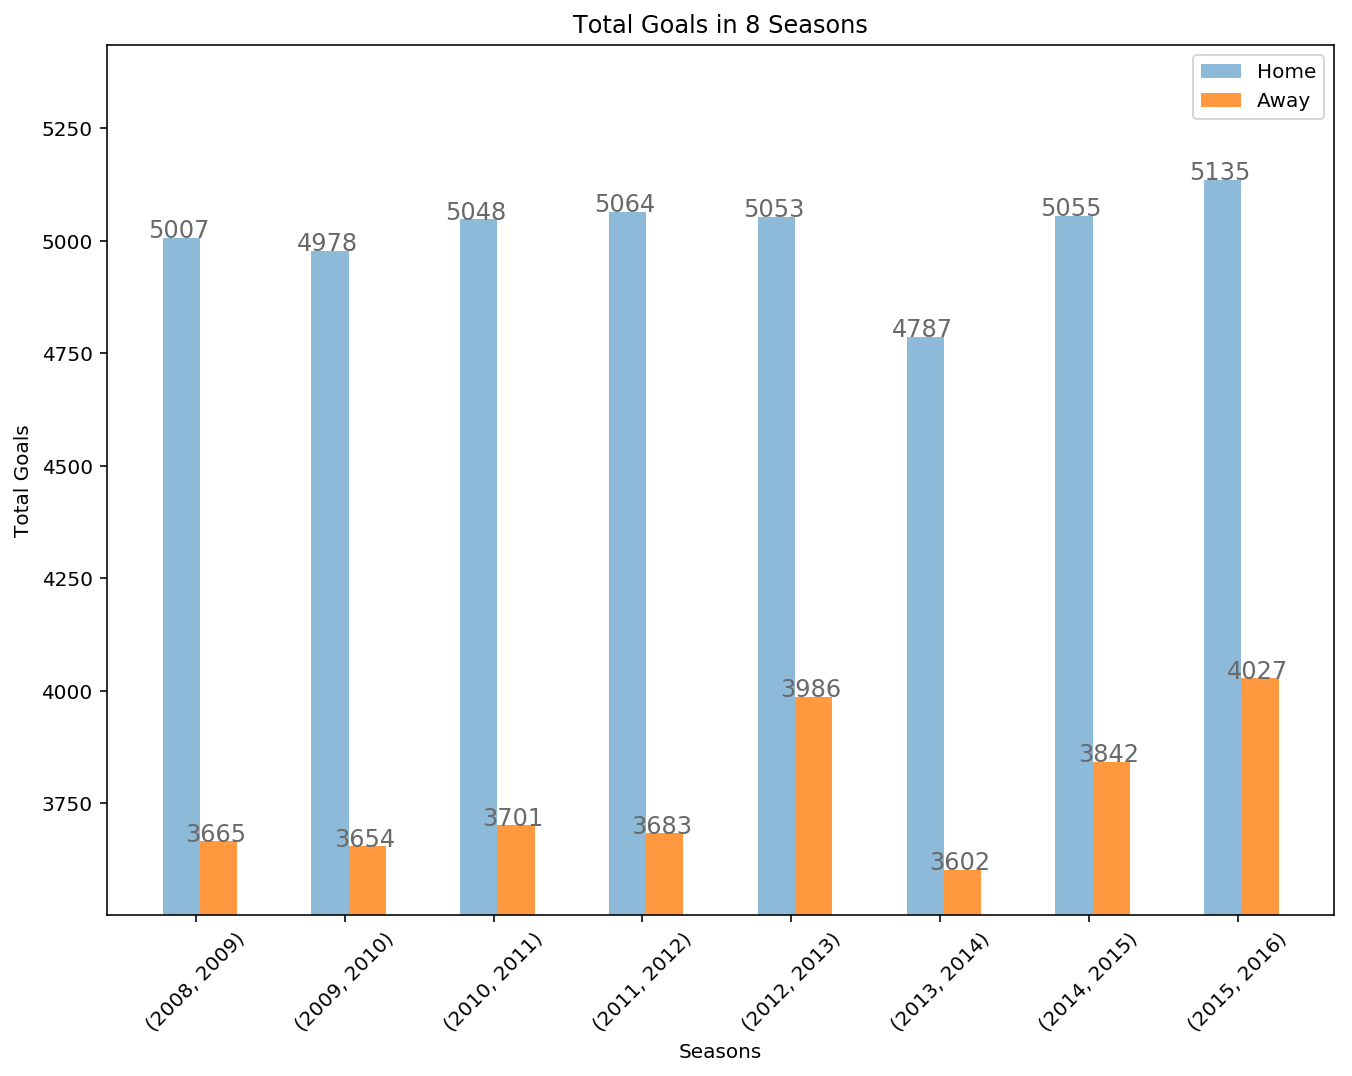

In [70]:
# Setting the positions and width for the bars
width = 0.25
positions = goals_per_season.index.labels[0]

fig, ax = plt.subplots(figsize=(11,8))

# one for total home goals per season
ax.bar(positions, home_goals, width, alpha=0.5)

# one for away goals per season
ax.bar([ i + width for i in positions], away_goals, width,alpha=0.8)

# Set the y axis label
ax.set_ylabel('Total Goals')

# Set the chart's title
ax.set_title('Total Goals in 8 Seasons')

# Set the y axis label 
plt.xlabel("Seasons")

plt.ylim(min(away_goals.min(), home_goals.min()) - 100, max(away_goals.max(), home_goals.max()) + 300)

# Set the position of the x ticks
ax.set_xticks([(p + 0.1) for p in positions])

# Set the position of the x ticks labels
ax.set_xticklabels(home_goals.index, rotation=45)

# set text to each bar
for i in ax.patches:
    ax.text(i.get_x() - 0.1, i.get_height(), str(i.get_height()), fontsize=12, color='dimgrey')

# Adding the legend and showing the plot
plt.legend(['Home', 'Away'], loc='best');

### Research Question 3 : Which team won on 2014/2015 season in Spain LIGA BBVA?

We need to apply a query operation to retrieve only the relevant rows. The matches must be played in the 2014/2015 season in Spain LIGA BBVA. In this case, we only look directly to the `winner` column. The winner column'll give us the total wins of each team in this season.

In [71]:
spain_matches = matches.query('country_name == "Spain" and start_season == 2014 and end_season == 2015')\
[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name', 'winner']]

spain_matches.head()

,home_team_goal,away_team_goal,home_team_name,away_team_name,winner
21631,0,0,Valencia CF,Athletic Club de Bilbao,Tie
21632,0,1,Valencia CF,FC Barcelona,FC Barcelona
21633,3,0,Valencia CF,Rayo Vallecano,Valencia CF
21634,2,1,Valencia CF,Real Madrid CF,Valencia CF
21635,3,2,Valencia CF,UD Almería,Valencia CF


To find out the total wins of each team, we must consume one of the Pandas function. As we expected, retrieving the first 4 most winners is sufficient to interpret the answer. However we need to do one more step because Real Madrid and Barcelona have the same number of wins. 

In [72]:
winner_spain_goals = spain_matches['winner'].value_counts()[:4]
winner_spain_goals

Tie                91
Real Madrid CF     30
FC Barcelona       30
Atlético Madrid    23
Name: winner, dtype: int64

We're doing one more query operation. We only look matches where the winner is 'Tie' and home or away team is Barcelona or Real Madrid. As a result, Barcelona ties 4 times while Real Madrid ties 2 times. 

In [73]:
spain_matches.query('winner == "Tie" and '\
                   '(home_team_name in ["FC Barcelona", "Real Madrid CF"] or away_team_name in ["FC Barcelona", "Real Madrid CF"])')

,home_team_goal,away_team_goal,home_team_name,away_team_name,winner
22764,2,2,Sevilla FC,FC Barcelona,Tie
23044,1,1,Real Madrid CF,Villarreal CF,Tie
23051,2,2,Real Madrid CF,Valencia CF,Tie
23205,2,2,FC Barcelona,RC Deportivo de La Coruña,Tie
23343,0,0,Getafe CF,FC Barcelona,Tie
23699,0,0,Málaga CF,FC Barcelona,Tie


### Research Question 4 : What teams improved the most over the time period?

This questions is a bit tough. I had to pick 2 specific years to end up with a concrete solution. I have selected 2011, and 2015 to compare the details of the teams. In order words, using these years we analyze what teams improved the most. Let's start displaying the match table again:

In [74]:
df_match.head()

,id,date,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name,winner
0,1,2008-08-17,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,29,2008-11-15,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Tie
2,47,2008-11-29,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008-12-13,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2009-01-24,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


In order to select a year, we should know how many unique years exist in the table.

In [75]:
years = df_match.year.unique()
# number of unique years in the table
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [76]:
teams = df_match.away_team_name.unique()
len(teams)

296

Just to be sure, we checked whether the away and home team size is equal:

In [77]:
len(df_match.away_team_name.unique()) == len(df_match.home_team_name.unique())

True

So far so good. Now, we declare 2 variables that hold matches from the selected years. We look at the averages of away and home goals for each team for both years. Since we must compare team qualities, we should apply mean or other statistical approaches to estimate more about the teams.

In [78]:
df_match_2011 = df_match.query('year == 2011')

df_match_2015 = df_match.query('year == 2015')

df_match_2011_away = df_match_2011.groupby(['away_team_name'])['away_team_goal'].mean()

df_match_2011_home = df_match_2011.groupby(['home_team_name'])['home_team_goal'].mean()

df_match_2015_away = df_match_2015.groupby(['away_team_name'])['away_team_goal'].mean()

df_match_2015_home = df_match_2015.groupby(['home_team_name'])['home_team_goal'].mean()

df_match_total_2011 = (df_match_2011_away + df_match_2011_home) / 2

df_match_total_2015 = (df_match_2015_away + df_match_2015_home) / 2

diff_match_2015_2011 = df_match_total_2015 - df_match_total_2011

Missing values are not on our radar. So we can safely drop them.

In [79]:
diff_match_2015_2011.dropna(inplace=True)

In [80]:
print('Improved teams :' + str(diff_match_2015_2011[diff_match_2015_2011.sort_values() > 0].count()))

Improved teams :86


In [81]:
# sort the values 
sorted_index = diff_match_2015_2011.sort_values().index

This time, we consume a horizontal bar since we can better measure the 296 teams's average quality horizontally from 2011 to 2015. The horizontal bar depicts that there are teams that didn't improve themselves. Conversely, 86 team have improvements over the years.

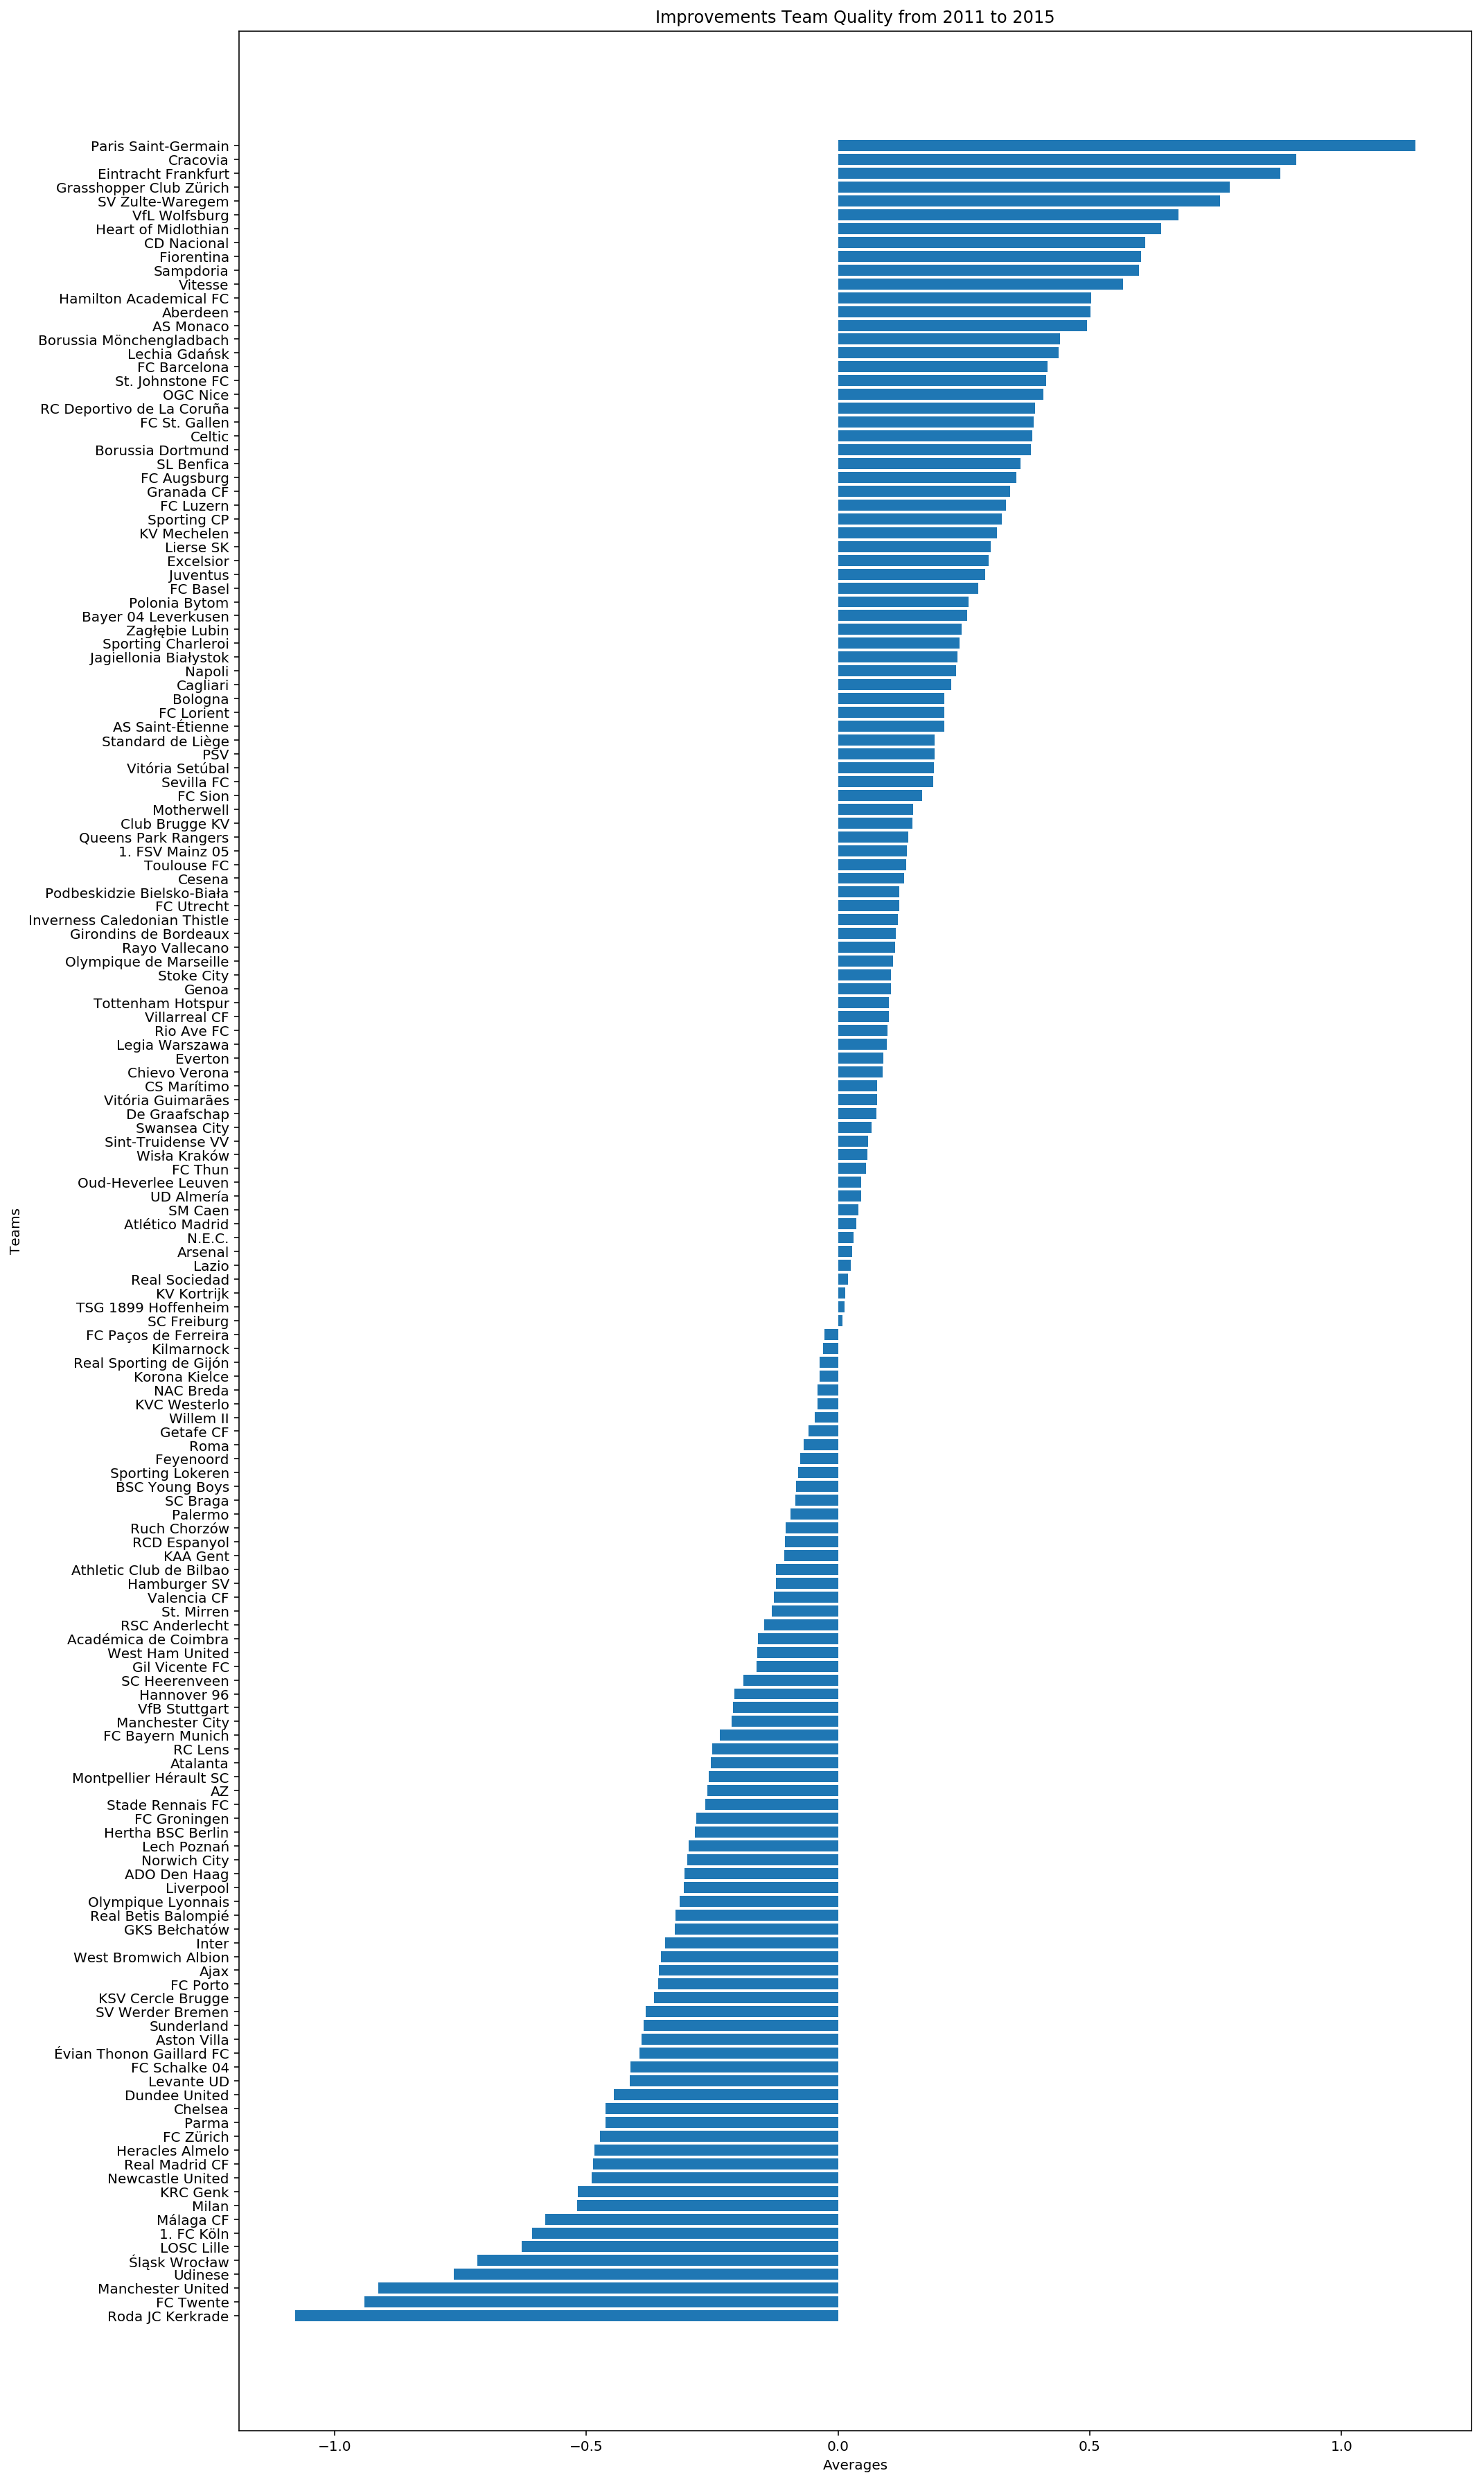

In [82]:
fig, ax = plt.subplots(figsize=(15, 25))

# plot a horizontal bar
plt.barh(range(0,len(sorted_index)), diff_match_2015_2011.sort_values())

# Set the position of the y ticks
ax.set_yticks(range(0,len(sorted_index)))

# Set the position of the y ticks labels
ax.set_yticklabels(sorted_index)

# Set the y axis label
ax.set_ylabel('Teams')

# Set the chart's title
ax.set_title('Improvements Team Quality from 2011 to 2015')

# Set the y axis label 
plt.xlabel("Averages")

plt.tight_layout();

### Research Question 5 : Which players had the most penalties?

The question is about obtaining players's penalties over the entire dataset. First things first, the players stats must be retrieved to find an answer.

In [83]:
players_stats = pd.read_csv('player_atts_clean.csv')
players_stats.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
2,3,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
3,4,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187
4,5,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187


We only care the players and their penalty scores. In order to find the total amount of penalty scores, we group each player and sum the penalties. As a result, we learn which players had the most penalties.

In [84]:
players_stats.groupby(['player_api_id', 'player_name'])['penalties'].sum().sort_values(ascending=False)[:10]

player_api_id  player_name       
41269          Alessio Cerci         4314.0
108808         Mario Balotelli       4120.0
41890          Claudio Marchisio     3984.0
26472          Michael Bradley       3813.0
25772          Zdravko Kuzmanovic    3799.0
30731          Andrea Pirlo          3791.0
27734          Antonio Di Natale     3767.0
30626          Thierry Henry         3712.0
40930          Adrien Silva          3682.0
47394          Adel Taarabt          3650.0
Name: penalties, dtype: float64

### Research Question 6 : What team attributes lead to the most victories?

To answer the question we need to know which teams has the most victories. To do so, we look at the match table where the season is 2015/2016 for that purpose. 

In [85]:
df_match_season = matches.query('start_season == 2015 and end_season == 2016')

In [86]:
winners = df_match_season.groupby('winner')['id'].count().sort_values(ascending=False)

we found the 10 most winners in 2015/2016 season.

In [87]:
winners[1:11]

winner
Paris Saint-Germain    30
FC Barcelona           29
Juventus               29
SL Benfica             29
Real Madrid CF         28
FC Bayern Munich       28
Atlético Madrid        28
Sporting CP            27
FC Basel               26
PSV                    26
Name: id, dtype: int64

Now, we need to look at these teams' stats in the Team Stats table:

In [88]:
team_att = pd.read_csv('team_attributes_edited.csv')
team_att.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name,year
0,1,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,...,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR,2010
1,2,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2014
2,3,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2015
3,4,8485,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,...,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE,2010
4,5,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,Organised,...,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE,2011


Since there are 27 columns in the team attributes table, we want to see only the numerical columns along with the team name column.

In [89]:
columns = ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',\
           'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',\
           'defencePressure', 'defenceAggression', 'defenceTeamWidth']

In [90]:
# set the name of the ten winners
ten_winners = winners[1:11].index

Since we know the ten winners in the 2015/2016 season, we can query the corresponding team stats of the selected teams on the team attributes table.

In [91]:
# query only the expected years and team_long_name must exist in the @ten_winners list
winners_stats = team_att.query('(year == 2015 or year == 2016) and team_long_name in @ten_winners')[columns]

In [92]:
winners_stats

,team_long_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
99,Atlético Madrid,57,50.0,50,61,62,49,49,42,52
123,FC Barcelona,36,35.0,51,36,49,56,61,65,65
135,FC Basel,61,63.0,46,66,66,54,47,58,53
147,FC Bayern Munich,45,24.0,28,37,31,22,72,53,59
165,SL Benfica,69,55.0,53,65,66,54,60,57,54
627,Juventus,50,35.0,20,65,50,80,35,65,35
963,Paris Saint-Germain,49,47.0,34,62,61,35,57,53,56
1009,PSV,67,43.0,43,53,44,28,40,40,48
1050,Real Madrid CF,50,57.0,46,61,41,63,52,60,63
1194,Sporting CP,57,65.0,56,42,50,55,60,60,54


The following charts demostrate the winner teams's attributes. The chart reveals 9 different attributes of 10 winners in 2015-16. To analyze sequential data, creating a bar chart mostly shows the important parts of information.

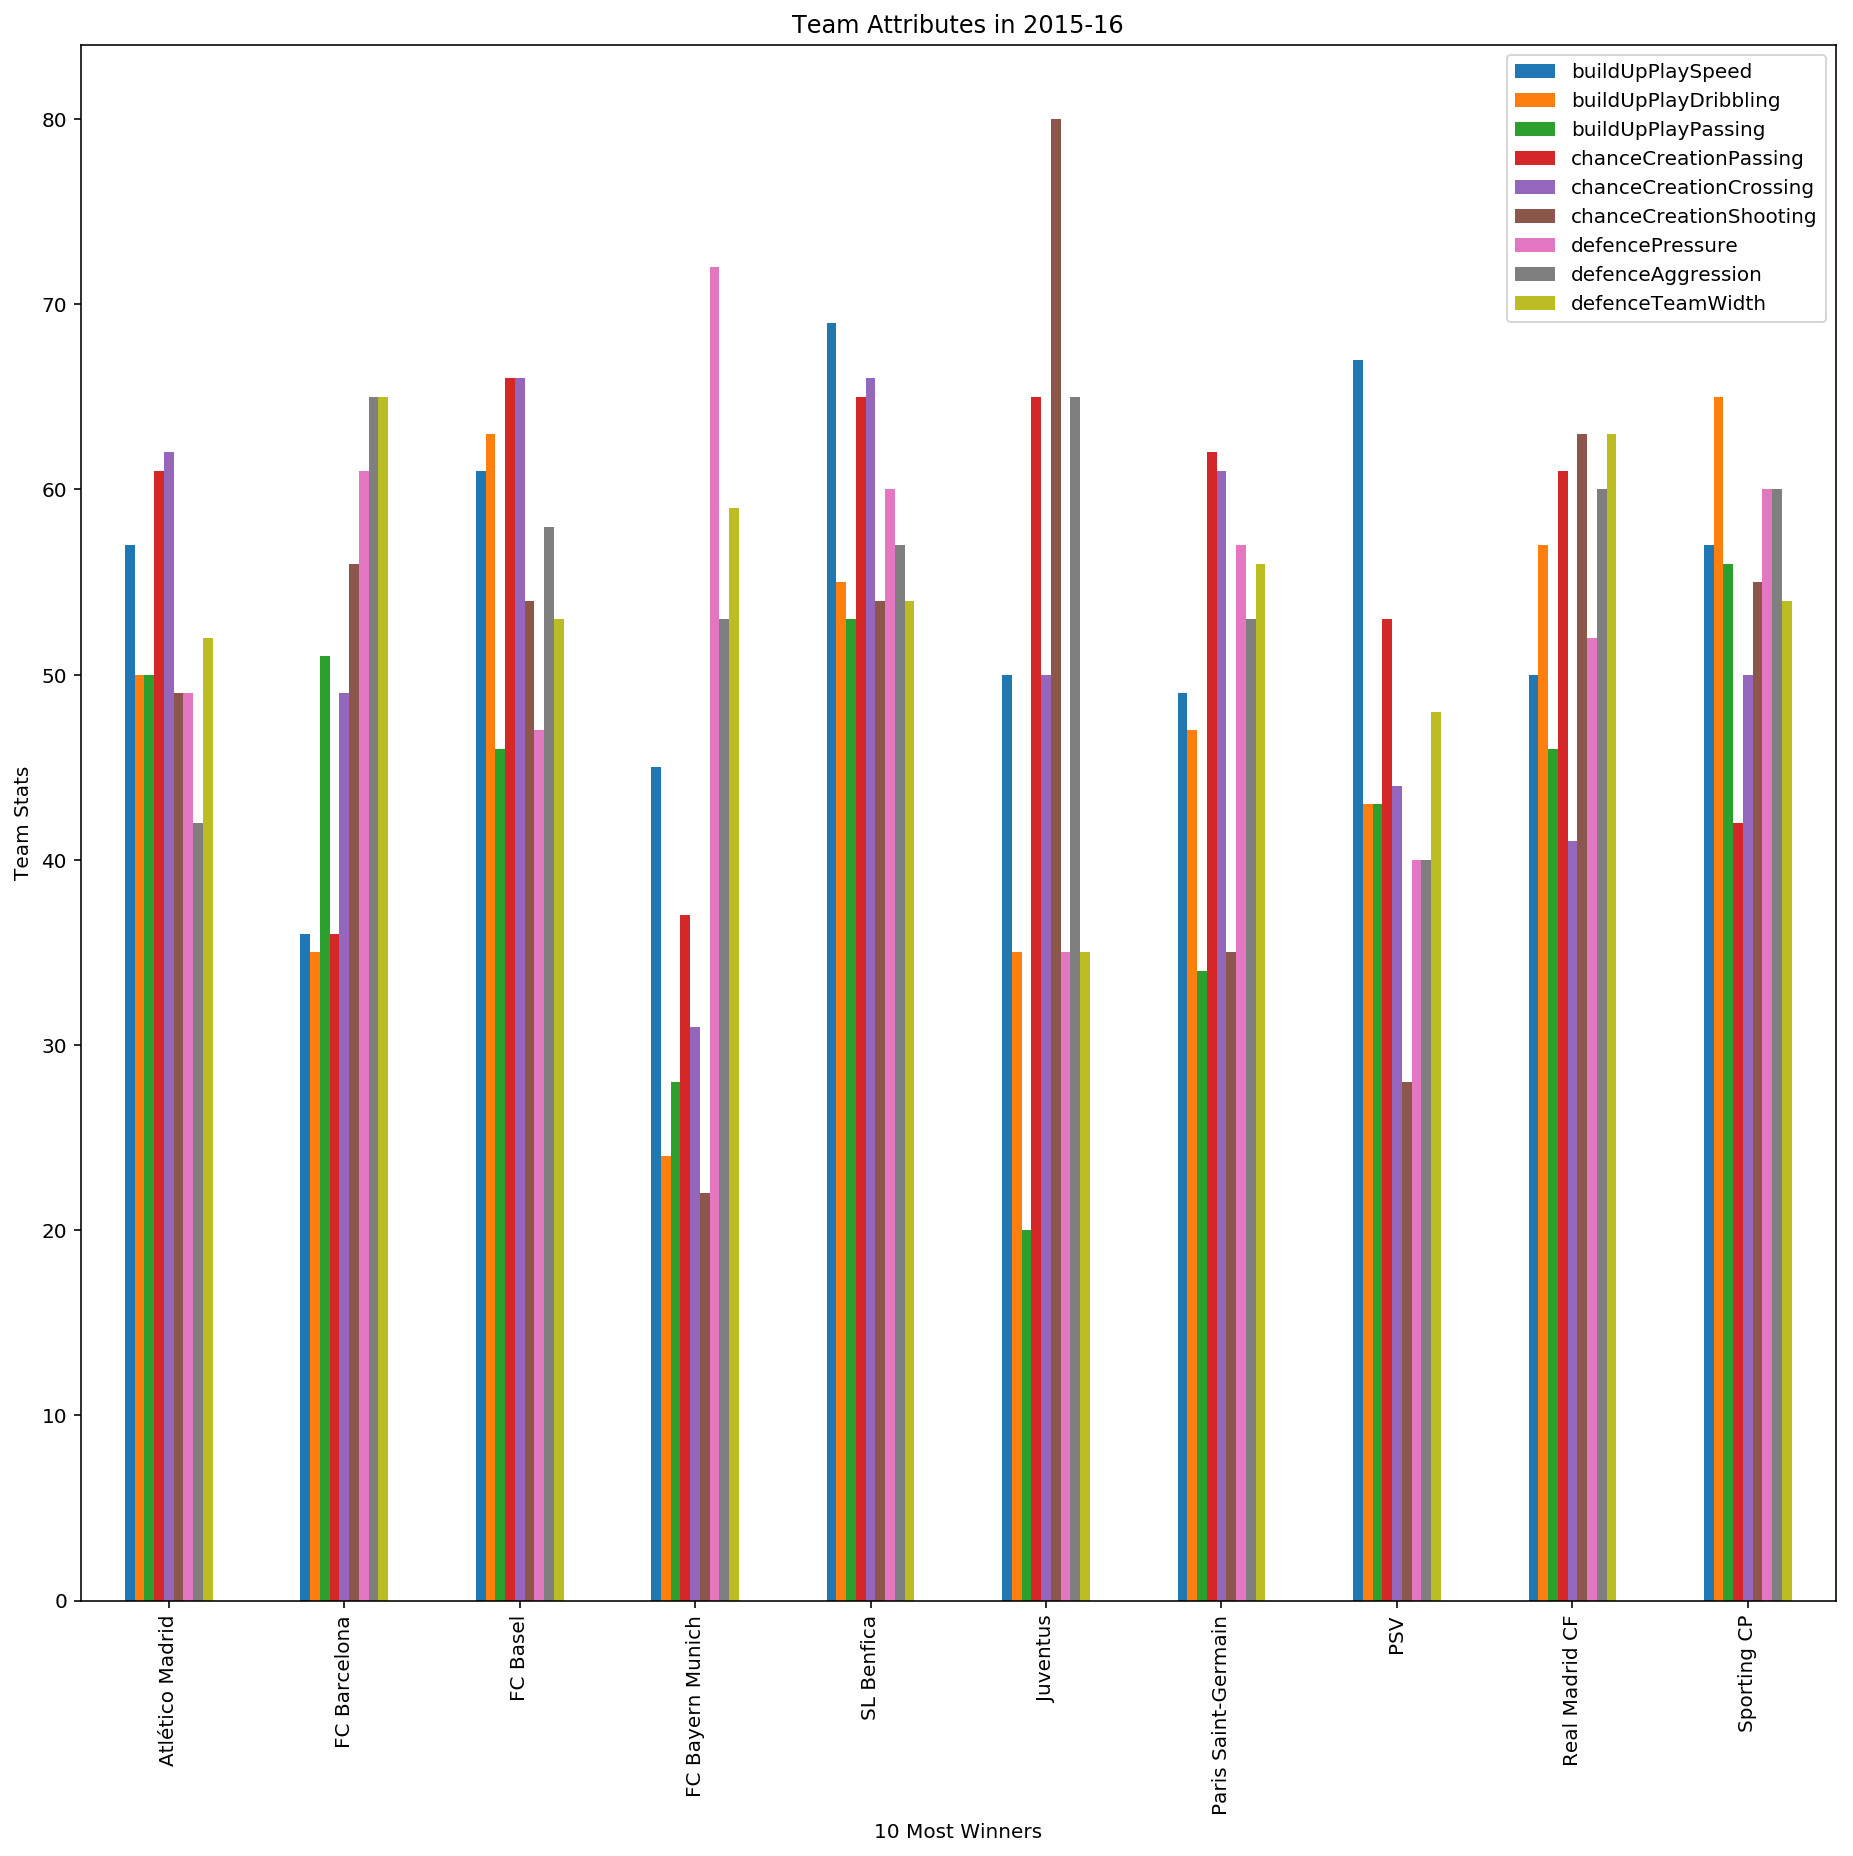

In [93]:
fig, ax = plt.subplots(figsize=(13, 13))

# create a new bar char
ax = winners_stats.plot.bar(ax=ax);

ax.set_xticklabels(winners_stats['team_long_name'], rotation=90)

# Set the y axis label
ax.set_ylabel('Team Stats')

# Set the chart's title
ax.set_title('Team Attributes in 2015-16')

# Set the y axis label 
plt.xlabel("10 Most Winners")

plt.tight_layout();

<a id='limitations'></a>
## Limitations

In this section, I'll talk about the challanges that I have faced during finding ways to the questions. The Match and Player Attributes tables are the most challanging tables among the others in the Soccer database. 

The Match table contained `407395` missing values. I have dediced to not fill the missing values with a specific value bacause the most missing values are about betting in which I am not interested. I dropped the columns contaning missing values. After dropping the columns our new table shows the first 11 columns which it makes sense for the questions. Next to this, I have used 4 merge operations to collect the necessary information from other tables. The Match table has a relation with Player, Country, and League tables. Also there are some columns that I needed to simplify in order to solve the questions. For example, I split the column `session` into two seperate columns namely `start_season` and `end_season`. The column `session` contained a value like `2014/2015` so I split each  year from the cells and added them to two different columns. The `Date` column needed to be converted to `datatime` because I wanted to declare a new column for the years. Lastly, to know who won a match, I have created another column by looking at the four columns. The steps I have taken helped me find the solutions of `What teams improved the most over the time period?`, `Which team won on 2014/2015 season in Spain LIGA BBVA?`, `Which season had the most home and/or away goals over the seasons?`, and `Which team had the most victories at home in 2010/2011 season?`. 

Another challenging table was a bit the Team table. I found 3 teams having the same `fifa_id` and `team_name`. Grouping by `fifa_id` and `team_name` found the duplicated rows.

One missing column that appears in the Player Attributes table is the `buildUpPlayDribbling` column. I haven't paid too much attention to that column because I have interpred the missing values as zeros to answer `What team attributes lead to the most victories?`. The Player Attributes table also contains a relation with the Player table. Applying a merge step solved to find the details of players such as birthday, heighh, and weight.


<a id='conclusions'></a>
## Conclusions

In this section, I have ended up with conclusions with regard to the findings.

1. Which team had the most victories at home in 2010/2011 season?

    Manchester United had the most victories at home in 2010/2011 season among the other clubs. Congratulations MUN!

2. Which season had the most home and/or away goals over the seasons?

    The bar char illustrates that the most home as well as away goals reveal in the 2015/2016 season.
    
3. Which team won on 2014/2015 season in Spain LIGA BBVA?

    In 2014/2015 season Barcelona and Real Madrid share the same number of wins. Since every win is 3 points, both Barcelona and Real Madrid have 90 points. It looks like four games of Barcelona ended in a draw, on the other hand, Real Madrid has two draw games. As a result, the champion of the 2014/2015 season is Barcelona with the 94 points in total.

4. What teams improved the most over the time period?

     Based on the years I have selected, the most improved teams over the period by looking at the average away and home goals are 'Paris Saint-Germain', 'Cracovia', 'Eintracht Frankfurt', 'Grasshopper Club Zürich', 'SV Zulte-Waregem'.

5. Which players had the most penalties?

    Alessio Cerci and Mario Balotelli are the most penalty scorer in total.

6. What team attributes lead to the most victories?

    In this question like the fourth question I have selected a season which was the 2015/2016 season. In terms of the season, I have found 10 most winners (Paris Saint-Germain, FC Barcelona, Juventus, SL Benfica, Real Madrid CF, FC Bayern Munich, Atlético Madrid, Sporting CP, FC Basel, PSV). The bar char demostrates that the most team attributes that lead the teams to win depend on the `changeCreationPassing`, `defencePressure`, `defenceAggression`, `buildUpSpeed`, and `buildUpDribbling` column.